In [1]:
import numpy as np
import pandas as pd
import math
import random
import sklearn
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Check data

In [2]:
shots_euro_champ = pd.read_csv('/coursedata/sport_data/shots_European_Championship.csv')
shots_euro_champ.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,31,91,29,0,1,0,0,0,0
1,1,143,71,29,0,1,0,0,1,0
2,1,220,96,57,0,1,0,0,1,0
3,1,248,96,61,0,0,0,1,1,0
4,1,557,75,33,0,0,1,0,0,0


In [3]:
shots_france = pd.read_csv('/coursedata/sport_data/shots_France.csv')
shots_france.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,606,94,57,0,1,0,0,1,1
1,1,859,83,42,0,0,0,1,0,0
2,1,1568,96,43,0,1,0,0,1,1
3,1,1801,84,21,0,1,0,0,0,0
4,1,2010,73,51,0,1,0,0,1,0


In [4]:
shots_germany = pd.read_csv('/coursedata/sport_data/shots_Germany.csv')
shots_germany.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,248,83,66,0,1,0,0,1,0
1,1,529,95,59,0,0,0,1,1,1
2,1,668,91,66,0,1,0,0,1,0
3,1,673,88,49,0,1,0,0,1,0
4,1,949,74,42,0,1,0,0,0,0


In [5]:
shots_italy = pd.read_csv('/coursedata/sport_data/shots_Italy.csv')
shots_italy.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,194,80,41,0,1,0,0,1,0
1,1,251,95,33,0,0,1,0,1,0
2,1,634,72,63,0,1,0,0,0,0
3,1,1359,91,62,0,1,0,0,1,0
4,1,1413,86,26,0,0,1,0,0,0


In [6]:
shots_spain = pd.read_csv('/coursedata/sport_data/shots_Spain.csv')
shots_spain.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,58,93,34,0,0,1,0,1,0
1,1,61,80,59,0,1,0,0,0,0
2,1,447,88,57,0,1,0,0,1,0
3,1,489,87,66,0,1,0,0,1,0
4,1,949,75,40,0,1,0,0,0,0


In [7]:
shots_world_cup = pd.read_csv('/coursedata/sport_data/shots_World_Cup.csv')
shots_world_cup.head()

,period,time,x,y,target,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,327,87,27,1.0,0,1,0,0,0,0
1,1,407,90,69,0.0,0,1,0,0,0,0
2,1,526,86,30,0.0,0,0,1,0,0,0
3,1,693,93,60,0.0,0,0,0,1,1,1
4,1,1266,86,38,1.0,0,0,1,0,0,0


In [8]:
shots_england = pd.read_csv('/coursedata/sport_data/shots_England.csv')
shots_england.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,95,88,41,0,1,0,0,1,1
1,1,180,85,52,0,0,1,0,1,0
2,1,255,96,52,0,0,0,1,1,1
3,1,426,81,33,0,0,1,0,1,0
4,1,815,75,30,0,1,0,0,1,0


In [9]:
shots_world_cup.drop(['target'],axis =1 , inplace = True)
shots_world_cup.head()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
0,1,327,87,27,0,1,0,0,0,0
1,1,407,90,69,0,1,0,0,0,0
2,1,526,86,30,0,0,1,0,0,0
3,1,693,93,60,0,0,0,1,1,1
4,1,1266,86,38,0,0,1,0,0,0


In [10]:
datasets = [shots_euro_champ, shots_france, shots_germany, shots_italy, shots_spain, shots_world_cup, shots_england]
sport = pd.concat(datasets)
sport.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45287 entries, 0 to 8800
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   period       45287 non-null  int64
 1   time         45287 non-null  int64
 2   x            45287 non-null  int64
 3   y            45287 non-null  int64
 4   freeKick     45287 non-null  int64
 5   rightFoot    45287 non-null  int64
 6   leftFoot     45287 non-null  int64
 7   head         45287 non-null  int64
 8   opportunity  45287 non-null  int64
 9   goal         45287 non-null  int64
dtypes: int64(10)
memory usage: 3.8 MB


In [11]:
sport.corr()

,period,time,x,y,freeKick,rightFoot,leftFoot,head,opportunity,goal
period,1.000000,0.023265,0.008072,0.007102,-0.000673,0.003478,0.005092,-0.011444,0.009926,0.020219
time,0.023265,1.000000,-0.001309,-0.006697,0.022012,-0.000751,-0.003939,0.006170,0.002883,-0.001258
x,0.008072,-0.001309,1.000000,0.013349,-0.228494,-0.183923,-0.086565,0.367228,0.349703,0.219435
y,0.007102,-0.006697,0.013349,1.000000,-0.008529,0.044381,-0.054882,0.010092,0.013884,0.005895
freeKick,-0.000673,0.022012,-0.228494,-0.008529,1.000000,0.043091,0.028270,-0.096444,-0.049640,-0.030047
rightFoot,0.003478,-0.000751,-0.183923,0.044381,0.043091,1.000000,-0.724388,-0.439877,-0.086632,-0.019168
leftFoot,0.005092,-0.003939,-0.086565,-0.054882,0.028270,-0.724388,1.000000,-0.300473,-0.046696,-0.004229
head,-0.011444,0.006170,0.367228,0.010092,-0.096444,-0.439877,-0.300473,1.000000,0.180686,0.032028
opportunity,0.009926,0.002883,0.349703,0.013884,-0.049640,-0.086632,-0.046696,0.180686,1.000000,0.215591
goal,0.020219,-0.001258,0.219435,0.005895,-0.030047,-0.019168,-0.004229,0.032028,0.215591,1.000000


In [12]:
sport['feet'] = sport['rightFoot'] + sport['leftFoot']
sport.drop(['rightFoot','leftFoot'], axis =1, inplace = True)
sport.head()

,period,time,x,y,freeKick,head,opportunity,goal,feet
0,1,31,91,29,0,0,0,0,1
1,1,143,71,29,0,0,1,0,1
2,1,220,96,57,0,0,1,0,1
3,1,248,96,61,0,1,1,0,0
4,1,557,75,33,0,0,0,0,1


In [13]:
sport['x'] = sport['x'] * 125/100
sport['y'] = sport['y'] * 85/100
sport.head()

,period,time,x,y,freeKick,head,opportunity,goal,feet
0,1,31,113.75,24.65,0,0,0,0,1
1,1,143,88.75,24.65,0,0,1,0,1
2,1,220,120.00,48.45,0,0,1,0,1
3,1,248,120.00,51.85,0,1,1,0,0
4,1,557,93.75,28.05,0,0,0,0,1


In [14]:
x0 = 125 - sport['x']
y0 = 85/2 - sport['y']
sport['distance'] = np.sqrt(x0**2 + y0**2)
angle = np.arctan((7.32*x0)/(x0**2 + y0**2 - (7.32/2)**2))
print(angle)

0       0.188455
1       0.162425
2       0.661561
3       0.354025
4       0.192761
          ...   
8796    0.205411
8797    0.250011
8798    0.334767
8799    0.366604
8800    0.412342
Length: 45287, dtype: float64


In [15]:
if (angle<0).all():
    angle = np.pi + angle
sport['angle radians'] = angle
sport['angle degrees'] = angle*180/np.pi
sport.head()

,period,time,x,y,freeKick,head,opportunity,goal,feet,distance,angle radians,angle degrees
0,1,31,113.75,24.65,0,0,0,0,1,21.099408,0.188455,10.797665
1,1,143,88.75,24.65,0,0,1,0,1,40.406497,0.162425,9.306244
2,1,220,120.00,48.45,0,0,1,0,1,7.771905,0.661561,37.904650
3,1,248,120.00,51.85,0,1,1,0,0,10.602948,0.354025,20.284138
4,1,557,93.75,28.05,0,0,0,0,1,34.429130,0.192761,11.044380


In [16]:
sport[sport.isnull().any(axis=1)]

,period,time,x,y,freeKick,head,opportunity,goal,feet,distance,angle radians,angle degrees


In [17]:
sport.corr()

,period,time,x,y,freeKick,head,opportunity,goal,feet,distance,angle radians,angle degrees
period,1.000000,0.023265,0.008072,0.007102,-0.000673,-0.011444,0.009926,0.020219,0.011444,-0.010845,0.003292,0.003292
time,0.023265,1.000000,-0.001309,-0.006697,0.022012,0.006170,0.002883,-0.001258,-0.006170,-0.004305,0.009299,0.009299
x,0.008072,-0.001309,1.000000,0.013349,-0.228494,0.367228,0.349703,0.219435,-0.367228,-0.940567,0.490864,0.490864
y,0.007102,-0.006697,0.013349,1.000000,-0.008529,0.010092,0.013884,0.005895,-0.010092,-0.037011,0.033789,0.033789
freeKick,-0.000673,0.022012,-0.228494,-0.008529,1.000000,-0.096444,-0.049640,-0.030047,0.096444,0.249240,-0.140552,-0.140552
head,-0.011444,0.006170,0.367228,0.010092,-0.096444,1.000000,0.180686,0.032028,-1.000000,-0.428004,0.409679,0.409679
opportunity,0.009926,0.002883,0.349703,0.013884,-0.049640,0.180686,1.000000,0.215591,-0.180686,-0.345914,0.231155,0.231155
goal,0.020219,-0.001258,0.219435,0.005895,-0.030047,0.032028,0.215591,1.000000,-0.032028,-0.252809,0.237336,0.237336
feet,0.011444,-0.006170,-0.367228,-0.010092,0.096444,-1.000000,-0.180686,-0.032028,1.000000,0.428004,-0.409679,-0.409679
distance,-0.010845,-0.004305,-0.940567,-0.037011,0.249240,-0.428004,-0.345914,-0.252809,0.428004,1.000000,-0.637907,-0.637907


In [18]:
sport.drop(['period', 'time', 'feet'], axis = 1, inplace = True)

In [19]:
sport.corr()

,x,y,freeKick,head,opportunity,goal,distance,angle radians,angle degrees
x,1.000000,0.013349,-0.228494,0.367228,0.349703,0.219435,-0.940567,0.490864,0.490864
y,0.013349,1.000000,-0.008529,0.010092,0.013884,0.005895,-0.037011,0.033789,0.033789
freeKick,-0.228494,-0.008529,1.000000,-0.096444,-0.049640,-0.030047,0.249240,-0.140552,-0.140552
head,0.367228,0.010092,-0.096444,1.000000,0.180686,0.032028,-0.428004,0.409679,0.409679
opportunity,0.349703,0.013884,-0.049640,0.180686,1.000000,0.215591,-0.345914,0.231155,0.231155
goal,0.219435,0.005895,-0.030047,0.032028,0.215591,1.000000,-0.252809,0.237336,0.237336
distance,-0.940567,-0.037011,0.249240,-0.428004,-0.345914,-0.252809,1.000000,-0.637907,-0.637907
angle radians,0.490864,0.033789,-0.140552,0.409679,0.231155,0.237336,-0.637907,1.000000,1.000000
angle degrees,0.490864,0.033789,-0.140552,0.409679,0.231155,0.237336,-0.637907,1.000000,1.000000


Data exploration

In [20]:
#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick

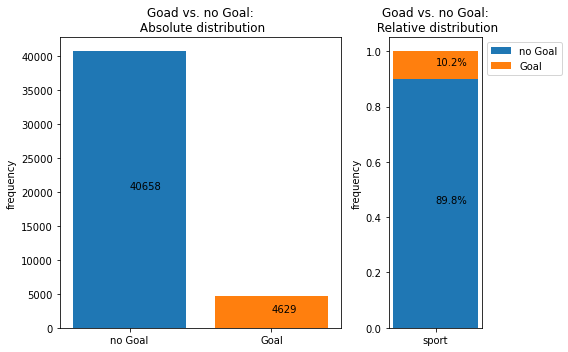

In [21]:
# plot Goad vs. no Goal
keys, counts = np.unique(sport.goal, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['no Goal', 'Goal'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Goad vs. no Goal:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['no Goal'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['Goal'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['sport'], [counts_norm[0]], label='no Goal')
ax1 = plt.bar(['sport'], [counts_norm[1]], bottom=counts_norm[0], label='Goal')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Goad vs. no Goal:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['sport'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['sport'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

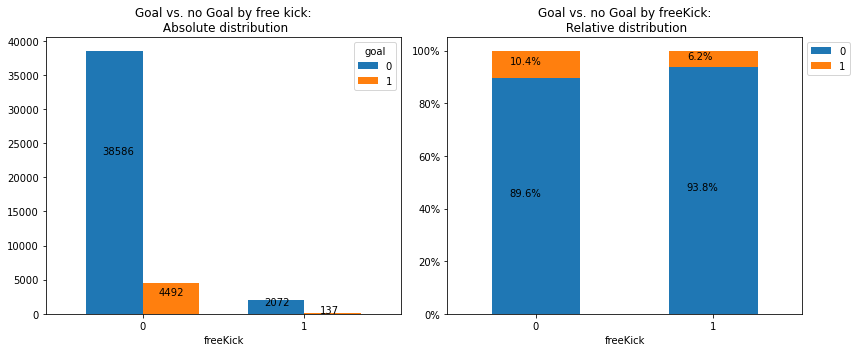

In [22]:
#Goal by free kick
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = sport.groupby(['freeKick', 'goal'])['goal'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Goal vs. no Goal by free kick:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = sport.groupby(['freeKick','goal'])['goal'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Goal vs. no Goal by freeKick:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

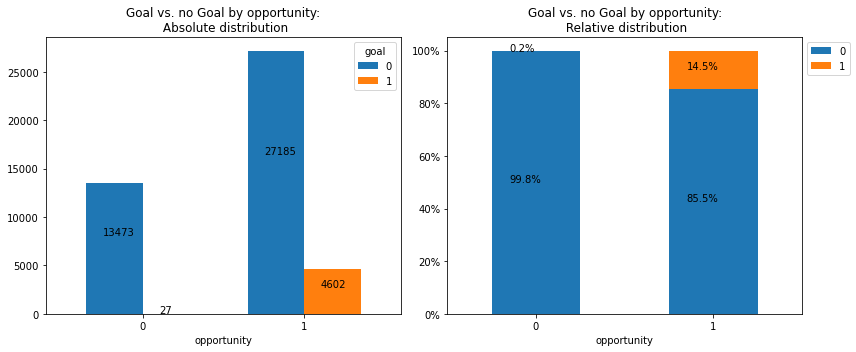

In [23]:
#Goal by opportunity
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = sport.groupby(['opportunity', 'goal'])['goal'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Goal vs. no Goal by opportunity:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = sport.groupby(['opportunity','goal'])['goal'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Goal vs. no Goal by opportunity:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

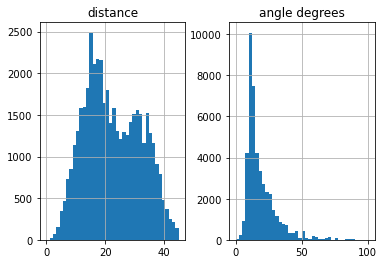

In [24]:
#plot distributions of shots by distance and angle side by side
fig, axes = plt.subplots(1, 2)
distance = sport.hist("distance",bins=40,range = (0,45),ax= axes[0])
angles = sport.hist("angle degrees",bins=40, range = (0,100),ax=axes[1])

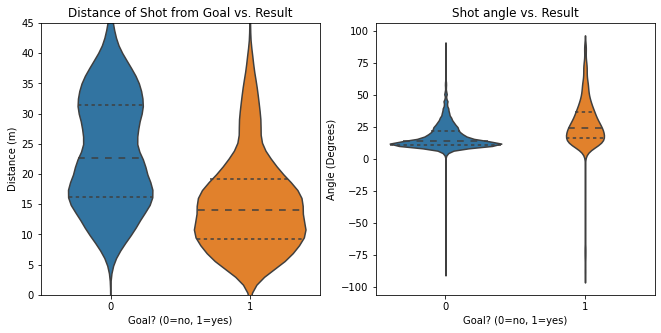

In [25]:
#use the seaborn library to inspect the distribution of the shots by result (goal or no goal) 
fig, axes = plt.subplots(1, 2,figsize=(11, 5))

#use seaborn lib for violin plot and extract necessary columns from our dataframe df
sport_dist = sns.violinplot(x="goal", y="distance",
                    data=sport, inner="quart",ax= axes[0])
sport_dist.set(xlabel="Goal? (0=no, 1=yes)",
       ylabel="Distance (m)",
       title="Distance of Shot from Goal vs. Result",ylim=(0, 45));

#similar as before
shot_ang = sns.violinplot(x="goal", y="angle degrees",
                    data=sport, inner="quart",ax = axes[1])
shot_ang.set(xlabel="Goal? (0=no, 1=yes)",
       ylabel="Angle (Degrees)",
       title="Shot angle vs. Result");

Model 1

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
X, y = sport[['freeKick','head','opportunity','distance','angle radians']], sport['goal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [28]:
lgm1 = LogisticRegression().fit(X_train, y_train)

In [29]:
log_odds = lgm1.coef_[0]
print(lgm1.intercept_)
print(pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False))

[-3.56386179]
                   coef
opportunity    3.723287
freeKick       1.077868
angle radians  0.477426
distance      -0.108569
head          -0.974926


In [30]:
y_pred_lgm1 = lgm1.predict(X_test)
y_predProba_lgm1 = lgm1.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lgm1)*100).round(2))

Accuracy is:  90.23


In [31]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Relative Feature Importance')

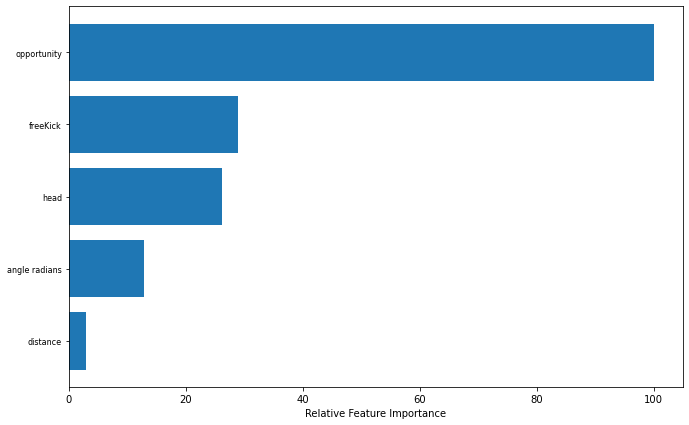

In [32]:
feature_importance = abs(lgm1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(11,7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

In [33]:
from sklearn.metrics import confusion_matrix
import itertools

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[8135   20]
 [ 865   38]]
Normalized confusion matrix
[[1.   0.  ]
 [0.96 0.04]]


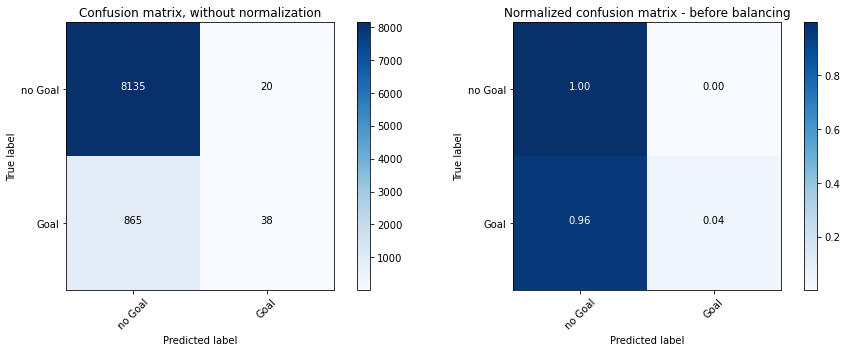

In [35]:
# Compute confusion matrix
class_names = ['no Goal', 'Goal']
cnf_matrix = confusion_matrix(y_test, y_pred_lgm1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - before balancing')


plt.show()



from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

In [37]:
lgm1_bal = LogisticRegression(solver='lbfgs').fit(X_sm, y_sm) #define Logistic Regression classifier

In [38]:
log_odds_bal = lgm1_bal.coef_[0]
print(lgm1_bal.intercept_)
print(pd.DataFrame(log_odds_bal, 
             X_train.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False))

[-1.74]
                   coef
opportunity    3.852320
freeKick       0.915824
angle radians  0.560805
distance      -0.098098
head          -0.961310


In [39]:
y_pred_lgm1_bal = lgm1_bal.predict(X_test)
y_predProba_lgm1_bal = lgm1_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lgm1_bal)*100).round(2))

Accuracy is:  63.92


Text(0.5, 0, 'Relative Feature Importance')

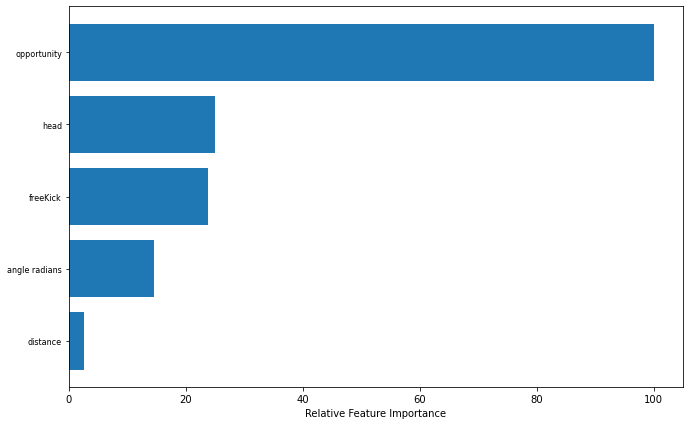

In [60]:
feature_importance = abs(lgm1_bal.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(11,7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

Confusion matrix, without normalization
[[5039 3116]
 [ 152  751]]
Normalized confusion matrix
[[0.62 0.38]
 [0.17 0.83]]


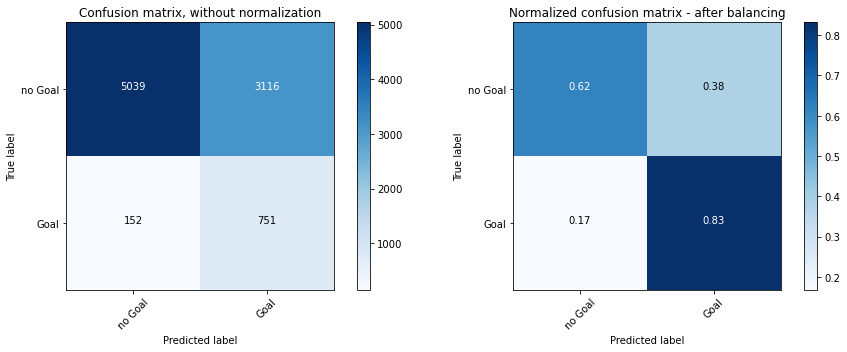

In [41]:
# Compute confusion matrix
class_names = ['no Goal', 'Goal']
cnf_matrix = confusion_matrix(y_test, y_pred_lgm1_bal)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix - after balancing')


plt.show()

--------------------------------

In [57]:
change = (np.exp(log_odds_bal)-1)
print(pd.DataFrame(change, 
             X_train.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False))

                    coef
opportunity    46.102227
freeKick        1.498834
angle radians   0.752082
distance       -0.093440
head           -0.617608


Other models and tests

In [43]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
train_dis = sport[['goal','distance']].copy()
x_train_dis, x_test_dis, y_train_dis, y_test_dis = train_test_split(train_dis.drop('goal',axis=1), 
                                                    train_dis['goal'], test_size=0.20, 
                                                    random_state=10)
from sklearn.linear_model import LogisticRegression
lgm_dis = LogisticRegression()
lgm_dis.fit(x_train_dis,y_train_dis)
log_odds = lgm_dis.coef_[0]
print(lgm_dis.coef_, lgm_dis.intercept_)
pd.DataFrame(log_odds, 
             x_train_dis.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

[[-0.12]] [0.06]


,coef
distance,-0.116371


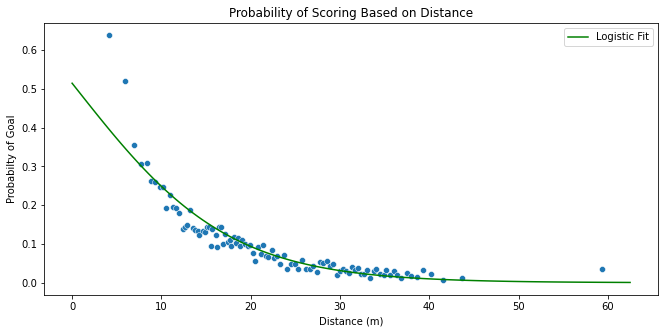

In [44]:
fig, axes = plt.subplots(figsize=(11, 5))
#first we want to create bins to calc our probability
#pandas has a function qcut that evenly distibutes the data 
#into n bins based on a desired column value
sport['goal']=sport['goal'].astype(int)
sport['Distance_Bins'] = pd.qcut(sport['distance'],q=100)
#now we want to find the mean of the Goal column(our prob density) for each bin
#and the mean of the distance for each bin
dist_prob = sport.groupby('Distance_Bins',as_index=False)['goal'].mean()['goal']
dist_mean = sport.groupby('Distance_Bins',as_index=False)['distance'].mean()['distance']
dist_trend = sns.scatterplot(x=dist_mean,y=dist_prob)
dist_trend.set(xlabel="Distance (m)",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Distance")
dis = np.linspace(0,62.5,125)
sns.lineplot(x = dis,y = 1/(1+np.exp((0.1164*dis-.0579))),color='green',legend='auto',label='Logistic Fit')


plt.show()

In [45]:
# we are going to have to use the pipe line function from sklearn to mesh a polynomial 
#function with logisitic regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
sport_dis_2 = sport[['goal','distance']].copy()
x_train_dis_2, x_test_dis_2, y_train_dis_2, y_test_dis_2 = train_test_split(sport_dis_2.drop('goal',axis=1), 
                                                    sport_dis_2['goal'], test_size=0.20, 
                                                    random_state=10)

poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
lgm_dis_2 = LogisticRegression()
lgm_dis_2.fit(x_train_dis_2,y_train_dis_2)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lgm_dis_2)])
pipe.fit(x_train_dis_2, y_train_dis_2)



print(lgm_dis_2.coef_,lgm_dis_2.intercept_)

[[-0.18  0.  ]] [0.57]


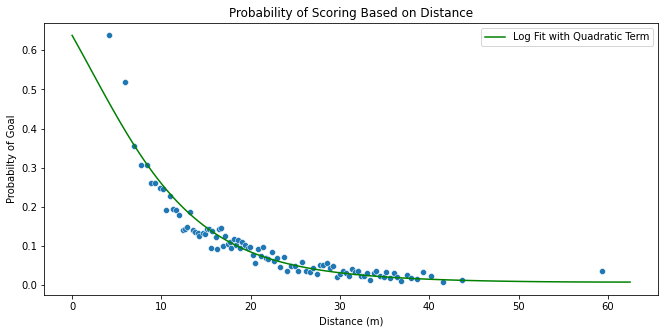

In [46]:
#use the seaborn library to inspect the distribution of the shots by result (goal or no goal) 
fig, axes = plt.subplots(figsize=(11, 5))
#first we want to create bins to calc our probability
#pandas has a function qcut that evenly distibutes the data 
#into n bins based on a desired column value
sport['goal']=sport['goal'].astype(int)
sport['Distance_Bins'] = pd.qcut(sport['distance'],q=100)
#now we want to find the mean of the Goal column(our prob density) for each bin
#and the mean of the distance for each bin
dist_prob = sport.groupby('Distance_Bins',as_index=False)['goal'].mean()['goal']
dist_mean = sport.groupby('Distance_Bins',as_index=False)['distance'].mean()['distance']
dist_trend = sns.scatterplot(x=dist_mean,y=dist_prob)
dist_trend.set(xlabel="Distance (m)",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Distance")
dis = np.linspace(0,62.5,125)
sns.lineplot(x = dis,y = 1/(1+np.exp((0.17591935*dis-0.00141975*dis**2-0.56724019))),color='green',
             label='Log Fit with Quadratic Term')



plt.show()

In [47]:
train_ang = sport[['goal','angle degrees']].copy()
x_train_ang, x_test_ang, y_train_ang, y_test_ang = train_test_split(train_ang.drop('goal',axis=1), 
                                                    train_ang['goal'], test_size=0.20, 
                                                    random_state=10)
from sklearn.linear_model import LogisticRegression
lgm_ang = LogisticRegression()
lgm_ang.fit(x_train_ang,y_train_ang)
log_odds_ang = lgm_ang.coef_[0]
print(lgm_ang.coef_, lgm_ang.intercept_)
pd.DataFrame(log_odds_ang, 
             x_train_ang.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)

[[0.05]] [-3.29]


,coef
angle degrees,0.052297


Two-parameter model

In [48]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [49]:
from mplsoccer.pitch import Pitch

In [50]:
train_2 = sport[['goal','distance','angle radians']].copy()
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(train_2.drop('goal',axis=1), 
                                                    train_2['goal'], test_size=0.30, 
                                                    random_state=1234)


lgm_2 = LogisticRegression(random_state=0)
lgm_2.fit(x_train_2,y_train_2)
log_odds = lgm_2.coef_[0]
print(lgm_2.coef_, lgm_2.intercept_)
print(pd.DataFrame(log_odds, 
             x_train_2.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False))

[[-0.11  0.32]] [-0.21]
                   coef
angle radians  0.322713
distance      -0.108269


In [51]:
y_pred_lgm_2 = lgm_2.predict(x_test_2)
y_predProba_lgm_2 = lgm_2.predict_proba(x_test_2)
print ("Accuracy is: ", (accuracy_score(y_test_2, y_pred_lgm_2)*100).round(2))

Accuracy is:  90.12


In [61]:
smote = SMOTE(sampling_strategy='minority')
X_sm2, y_sm2 = smote.fit_sample(x_train_2, y_train_2)

In [63]:
lgm_2_bal = LogisticRegression(random_state=0)
lgm_2_bal.fit(X_sm2, y_sm2)
log_odds2 = lgm_2_bal.coef_[0]
print(lgm_2_bal.coef_, lgm_2_bal.intercept_)
print(pd.DataFrame(log_odds2, 
             X_sm2.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False))

[[-0.1   0.45]] [1.66]
                   coef
angle radians  0.445766
distance      -0.095374


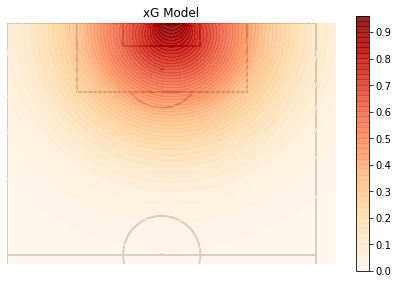

In [64]:
def Logistic(Y):
    g_y = 1 + np.exp(-Y)
    return np.reciprocal(g_y)


x0 = np.linspace(-42.5, 42.5, 100)
x1 = np.linspace(.1, 63 , 100)
x_0 = np.linspace(0, 85, 100)
x0_grid, x1_grid = np.meshgrid(x0, x1)
c=7.32
a=np.sqrt((x0_grid-7.32/2)**2 + x1_grid**2)
b=np.sqrt((x0_grid+7.32/2)**2 + x1_grid**2)
h_grid = Logistic(lgm_2_bal.coef_[0][1]*np.arccos((c**2-a**2-b**2)/(-2*a*b))
                  +lgm_2_bal.coef_[0][0]*np.sqrt((x1_grid)**2+(x0_grid)**2)+lgm_2_bal.intercept_[0])

pitch = Pitch(orientation="vertical",
           pitch_color='white',
           line_color="black")
fig, ax = pitch.draw()
#fig, ax = plt.subplots(figsize=(11, 7))


CS =plt.contourf(x_0,x1, h_grid,alpha=.85,cmap='OrRd',levels=50)


plt.title('xG Model')

#plt.axis('off')
ax.set_xlim(0,85)
ax.set_ylim(62.5,0)
plt.colorbar()